**SciKit-Stack and Deep Learning**
- Deep Learning – Run a Deep Learning Model: Build a Loan Amount Calculator using Multiple Linear Regression

- Dataset description: https://ggplot2.tidyverse.org/reference/diamonds.html 
- Dataset: https://github.com/tidyverse/ggplot2/blob/master/data-raw/diamonds.csv 

**Steps:**

- Use the diamonds dataset to perform a Deep Learning (Regression) model. 
- Target variable is price.
- Parameters to evaluate are MAE and MAPE. 
- Please report results for test and training dataset! Packages: Tensorflow and Keras

# Deep Learning for regression task

## Package Handling

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns # will provide so called SPLOMs or pairplots (Scatterplot Matrix)
import tensorflow as tf
import keras
from keras import layers
from keras import preprocessing
from keras import models
from keras.layers import Dense
# StandardScaler
# Standardization
from sklearn.preprocessing import StandardScaler
# import train_test_split
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Check current version of keras and tensorflow
print('keras version:', keras.__version__)
print('tensorflow version:', tf.__version__)

keras version: 2.4.3
tensorflow version: 2.4.1


In [3]:
# LNotebook output setting to reduce the number of digits in output
np.set_printoptions(precision=3, suppress=True)

## Data IO
- Diamonds dataset

In [37]:
# Import diamonds dataset from the internet
url = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"
diamonds_raw = pd.read_csv(url)

In [5]:
# make a backup
diamonds_backup = diamonds_raw.copy()

## Data Understanding
- Overview

In [6]:
diamonds_raw.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Data Preparation
- Missing data
- Categorical variables handling (one-hot encoding)
- Standardization
- Split into train and test set

### Missing Values
- Dimension x, y, z can't be 0, treated those values as missing values

In [41]:
# replace x = 0, y = 0, z = 0 with NaN and view it as missing values
diamonds_raw[['x','y','z']] = diamonds_raw[['x','y','z']].replace(0, np.NaN)
diamonds_raw.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y          20
z          20
dtype: int64

In [42]:
# drop the missing values
diamonds_raw.dropna(inplace = True)
print("The sum of missing values:")
print("\n")
display(diamonds_raw.isnull().sum())
print("\n")
print("the modified shape: ", diamonds_raw.shape)

The sum of missing values:




carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64



the modified shape:  (53920, 10)


### Transform categorical variable

In [11]:
# Transform categorical variables using one-hot encoding
diamonds_en = pd.get_dummies(diamonds_raw)
print("data shape before one-hot encoding:", diamonds_raw.shape)
print("data shape after one-hot encoding:", diamonds_en.shape) #17 more features

data shape before one-hot encoding: (53920, 10)
data shape after one-hot encoding: (53920, 27)


### Split data into test and train

In [12]:
X = diamonds_en.drop(['price'], axis = 1).astype(float)

In [13]:
y = diamonds_en.price.astype(float)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(43136, 26)
(10784, 26)


In [16]:
X_train.describe().transpose()[['mean','std']]

,mean,std
carat,0.797305,0.474168
depth,61.746905,1.428401
table,57.458626,2.227067
x,5.730634,1.119934
y,3.538715,0.692409
z,3.538715,0.692409
cut_Fair,0.029743,0.169880
cut_Good,0.090180,0.286443
cut_Ideal,0.399017,0.489702
cut_Premium,0.257001,0.436985


### Standardization

In [17]:
# Implement standardization
sc = StandardScaler()

In [18]:
# Fit to the X_train data
sc.fit(X_train)

StandardScaler()

In [19]:
# Apply to the X_train data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
X_train_std

array([[-0.522, -0.173, -0.655, ..., -0.541, -0.272, -0.323],
       [ 1.06 , -1.083,  0.692, ..., -0.541, -0.272, -0.323],
       [-0.775,  0.107, -1.104, ...,  1.849, -0.272, -0.323],
       ...,
       [-0.838,  0.177, -0.655, ..., -0.541, -0.272,  3.099],
       [ 0.217,  0.737,  0.692, ..., -0.541, -0.272, -0.323],
       [ 0.87 ,  0.807,  0.243, ..., -0.541, -0.272, -0.323]])

## Deep Learning Model
- Build the network
- Compile the network
- Fit the network to the data
- Evaluate the result
- Fine-Tune the network

In [21]:
# Build the network
network = models.Sequential()

In [22]:
# Add layers
network.add(layers.Dense(256, activation='relu', input_dim = X_train.shape[1]))
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(1, activation = 'linear'))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6912      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 48,129
Trainable params: 48,129
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
network.compile(loss = 'mean_absolute_error',
                optimizer = 'adam',
                metrics = ['mape', 'mae'])

In [24]:
# Fit the model to the data
history = network.fit(X_train_std, y_train,batch_size=64, validation_split=0.2, epochs=20, verbose=2)

Epoch 1/20
540/540 - 2s - loss: 1181.1691 - mape: 29.7166 - mae: 1181.1691 - val_loss: 414.7484 - val_mape: 10.9706 - val_mae: 414.7484
Epoch 2/20
540/540 - 1s - loss: 376.9331 - mape: 10.1445 - mae: 376.9331 - val_loss: 366.0881 - val_mape: 9.4211 - val_mae: 366.0881
Epoch 3/20
540/540 - 1s - loss: 345.7108 - mape: 9.2604 - mae: 345.7108 - val_loss: 348.4586 - val_mape: 9.3351 - val_mae: 348.4586
Epoch 4/20
540/540 - 1s - loss: 333.1226 - mape: 8.9687 - mae: 333.1226 - val_loss: 338.7702 - val_mape: 8.9003 - val_mae: 338.7702
Epoch 5/20
540/540 - 1s - loss: 325.5092 - mape: 8.7851 - mae: 325.5092 - val_loss: 331.1254 - val_mape: 8.6165 - val_mae: 331.1254
Epoch 6/20
540/540 - 1s - loss: 318.5967 - mape: 8.6010 - mae: 318.5967 - val_loss: 338.4320 - val_mape: 9.1312 - val_mae: 338.4320
Epoch 7/20
540/540 - 1s - loss: 315.0432 - mape: 8.5179 - mae: 315.0432 - val_loss: 326.7234 - val_mape: 8.8081 - val_mae: 326.7234
Epoch 8/20
540/540 - 1s - loss: 314.4221 - mape: 8.5128 - mae: 314.4221

In [25]:
# Plot the fitting process:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([280,1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

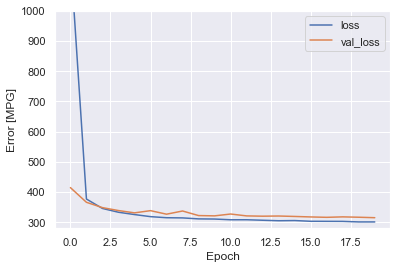

In [26]:
plot_loss(history)

In [27]:
# test on test set
test = network.evaluate(X_test_std, y_test, verbose = 1)

337/337 [==============================] - 1s 1ms/step - loss: 320.0869 - mape: 9.1003 - mae: 320.0869


In [28]:
y_pred = network.predict(X_test_std)

## Evaluation of the Model
- R2
- Adjusted R2
- Mean Squared Error
- Mean Absolute Error
- Mean Absolute Percentage Error

In [36]:
R2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1] - 1
adj_rsquared = 1-(1-R2)*((n-1)/(n-p-1))

In [35]:
# Evaluation of Deep Learning model
print("DL R2 is:", r2_score(y_test, y_pred))
print("DL Adjusted R2 is:", adj_rsquared)
print("DL Mean Squared Error is:", mse)
print("DL Mean Absolute Error is:", mean_absolute_error(y_test, y_pred))
print("DL Mean Absolute Percentage Error is:", mean_absolute_percentage_error(y_test, y_pred))

DL R2 is: 0.8517288327124773
DL Adjusted R2 is: 0.8513842724612979
DL Mean Squared Error is: 2377076.068881698
DL Mean Absolute Error is: 320.0869640525795
DL Mean Absolute Percentage Error is: 0.09100274753264226
